In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt

In [ ]:
url = 'https://raw.githubusercontent.com/MDices/datasets/main/music_genre.csv'
music = pd.read_csv(url, sep = ',')
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
music.shape

(50005, 18)

In [ ]:
music.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [ ]:
music.nunique()

instance_id         50000
artist_name          6863
track_name          41699
popularity             99
acousticness         4193
danceability         1088
duration_ms         26028
energy               2085
instrumentalness     5131
key                    12
liveness             1646
loudness            17247
mode                    2
speechiness          1337
tempo               29394
obtained_date           5
valence              1615
music_genre            10
dtype: int64

In [ ]:
# Verifica valores nulos
for attribute in music:
    null_values = music[attribute].isnull().sum()
    if null_values > 0:
        print(attribute + ': ' + str(null_values))

instance_id: 5
artist_name: 5
track_name: 5
popularity: 5
acousticness: 5
danceability: 5
duration_ms: 5
energy: 5
instrumentalness: 5
key: 5
liveness: 5
loudness: 5
mode: 5
speechiness: 5
tempo: 5
obtained_date: 5
valence: 5
music_genre: 5


In [ ]:
# Apagando os registros que contem nulo
music = music.dropna()

In [ ]:
len(music["instance_id"].unique())

50000

In [ ]:
len(music["artist_name"].unique())

6863

In [ ]:
music["key"].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

In [ ]:
music["mode"].unique()

array(['Minor', 'Major'], dtype=object)

In [ ]:
music["obtained_date"].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', '0/4'], dtype=object)

In [ ]:
music["music_genre"].unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [ ]:
music.reset_index(inplace = True)

In [ ]:
music = music.drop(["index", "instance_id", "track_name", "obtained_date", "artist_name"], axis = 1)

In [ ]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [ ]:
music[music["tempo"] == "?"]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
5,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,0.6140,Electronic
32,45.0,0.02330,0.729,274286.0,0.869,0.585000,F,0.0944,-7.569,Minor,0.1290,?,0.1380,Electronic
35,33.0,0.10800,0.493,-1.0,0.682,0.000000,A,0.1960,-5.781,Minor,0.2870,?,0.2390,Electronic
36,45.0,0.04780,0.646,253333.0,0.649,0.002520,G,0.3530,-5.259,Major,0.1170,?,0.7270,Electronic
39,37.0,0.20300,0.769,429941.0,0.551,0.882000,A#,0.1090,-12.520,Minor,0.0408,?,0.0618,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49913,58.0,0.29600,0.379,292520.0,0.644,0.000000,A#,0.3130,-7.933,Minor,0.1120,?,0.1440,Hip-Hop
49959,59.0,0.08470,0.929,215200.0,0.737,0.000000,G#,0.8610,-6.424,Major,0.1020,?,0.8860,Hip-Hop
49962,62.0,0.17900,0.860,233293.0,0.625,0.000136,D,0.3000,-6.922,Major,0.1050,?,0.2210,Hip-Hop
49971,52.0,0.70000,0.462,225067.0,0.741,0.000000,A#,0.3400,-8.008,Minor,0.1620,?,0.5890,Hip-Hop


In [ ]:
music = music.drop(music[music["tempo"] == "?"].index)

In [ ]:
music["tempo"]

0                   100.889
1        115.00200000000001
2                   127.994
3                   128.014
4                   145.036
                ...        
49995     98.02799999999999
49996    122.04299999999999
49997               131.079
49998     75.88600000000001
49999     99.20100000000001
Name: tempo, Length: 45020, dtype: object

In [ ]:
music["tempo"] = music["tempo"].astype("float")
music["tempo"] = np.around(music["tempo"], decimals = 2)

In [ ]:
music["tempo"]

0        100.89
1        115.00
2        127.99
3        128.01
4        145.04
          ...  
49995     98.03
49996    122.04
49997    131.08
49998     75.89
49999     99.20
Name: tempo, Length: 45020, dtype: float64

In [ ]:
music["key"]

0        A#
1         D
2        G#
3        C#
4        F#
         ..
49995    C#
49996     B
49997     D
49998     G
49999    F#
Name: key, Length: 45020, dtype: object

In [ ]:
key_encoder = LabelEncoder()
music["key"] = key_encoder.fit_transform(music["key"])

In [ ]:
music["key"]

0         1
1         5
2        11
3         4
4         9
         ..
49995     4
49996     2
49997     5
49998    10
49999     9
Name: key, Length: 45020, dtype: int64

In [ ]:
mode_encoder = LabelEncoder()
music["mode"] = mode_encoder.fit_transform(music["mode"])
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.89,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.00,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.99,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.01,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.04,0.323,Electronic


In [ ]:
key_encoder.classes_

array(['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype=object)

In [ ]:
mode_encoder.classes_

array(['Major', 'Minor'], dtype=object)

In [ ]:
music.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
music_genre          object
dtype: object

**Separate labels from features**

In [ ]:
music_features = music.drop("music_genre", axis = 1)
music_labels = music["music_genre"]

# **Scale features**
all values in all variables within the same range

In [ ]:
scaler = StandardScaler()

In [ ]:
music_features_scaled = scaler.fit_transform(music_features)

In [ ]:
music_features_scaled.mean(), music_features_scaled.std()

(-2.5252518374414932e-17, 0.9999999999999999)

**Split data into train, validation, and test set**

In [ ]:
tr_val_f, test_features, tr_val_l, test_labels = train_test_split(
    music_features_scaled, music_labels, test_size = 0.1, stratify = music_labels)

In [ ]:
train_features, val_features, train_labels, val_labels = train_test_split(
    tr_val_f, tr_val_l, test_size = len(test_labels), stratify = tr_val_l)

In [ ]:
train_features.shape, train_labels.shape, val_features.shape, val_labels.shape, test_features.shape,   test_labels.shape

((36016, 13), (36016,), (4502, 13), (4502,), (4502, 13), (4502,))

**Random Forest**

In [ ]:
f1 = make_scorer(f1_score, average = "weighted")

In [ ]:
params = {
    "n_estimators": [10, 15, 20, 25, 30, 35],
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = params, scoring = f1, cv = 5)

In [ ]:
grid_search.fit(train_features, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 15, 20, 25, 30, 35]},
             scoring=make_scorer(f1_score, average=weighted))

In [ ]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 5, 'n_estimators': 25}

In [ ]:
model = RandomForestClassifier(n_estimators = 25, max_depth = 15, min_samples_leaf = 5)

In [ ]:
model.fit(train_features, train_labels)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=25)

In [ ]:
def classification_task(estimator, features, labels):
    """
    Evaluates classification by predicting ("predict") and evaluation ("score") of the modelling alogirthm.

    Arguments:
        Estimator, features (X) and labels (y).

    Returns:
        Model's performance measured in terms of accuracy and f1_score.
    """
    predictions = estimator.predict(features)

    print(f"Accuracy: {accuracy_score(labels, predictions)}")
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

In [ ]:
classification_task(model, train_features, train_labels)

Accuracy: 0.7760439804531319
F1 score: 0.7761077611164107


In [ ]:
classification_task(model, val_features, val_labels)

Accuracy: 0.5630830741892492
F1 score: 0.5610921424229025


In [ ]:
classification_task(model, test_features, test_labels)

Accuracy: 0.5615282096845846
F1 score: 0.55884772652658


In [ ]:
print(classification_report(test_labels, model.predict(test_features)))

              precision    recall  f1-score   support

 Alternative       0.50      0.37      0.43       449
       Anime       0.80      0.71      0.75       450
       Blues       0.58      0.52      0.55       447
   Classical       0.82      0.84      0.83       450
     Country       0.60      0.58      0.59       449
  Electronic       0.64      0.62      0.63       447
     Hip-Hop       0.37      0.41      0.39       452
        Jazz       0.52      0.52      0.52       452
         Rap       0.34      0.29      0.31       450
        Rock       0.49      0.76      0.60       456

    accuracy                           0.56      4502
   macro avg       0.57      0.56      0.56      4502
weighted avg       0.57      0.56      0.56      4502



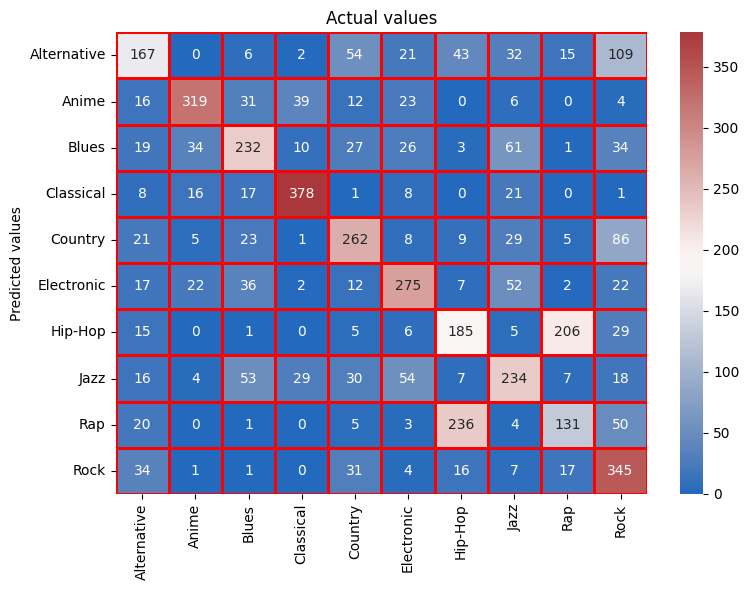

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(test_labels, model.predict(test_features)),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = model.classes_,
    yticklabels = model.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

In [ ]:
predicted_labels = model.predict_proba(test_features)

In [ ]:
roc_auc_score(test_labels, predicted_labels, multi_class = "ovr")

0.9229506527564476

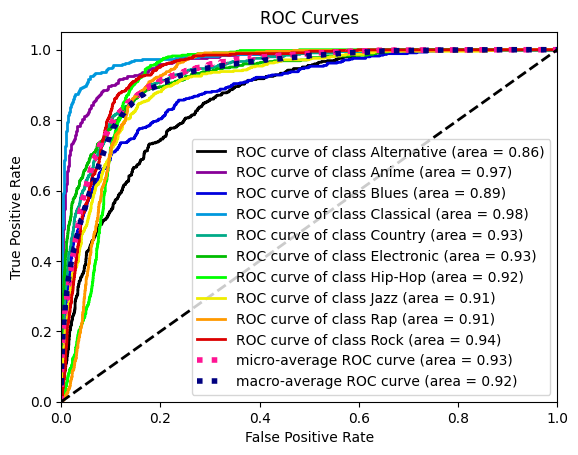

In [ ]:
skplt.metrics.plot_roc(test_labels, predicted_labels)
plt.show()